In [ ]:
def trace_2(mat):
  return mat[0][0] + mat[1][1]

def det_2(mat):
  return mat[0][0] * mat[1][1] - mat[0][1] * mat[1][0]

def calc_own_numbers_2(mat):
  n = len(mat)
  lamb = [0] * n
  trace = trace_2(mat)
  det = det_2(mat)
  # Расчет собственных значений
  discr = trace**2 - 4 * det
  if discr > 0:
    lamb[0] = (trace + discr**0.5) / 2
    lamb[1] = (trace - discr**0.5) / 2
  elif discr == 0:
    lamb[0] = lamb[1] = trace / 2
  return lamb

def trace_3(mat):
  return mat[0][0] + mat[1][1] + mat[2][2]

def det_3(mat):
  det = mat[0][0] * (mat[1][1] * mat[2][2] - mat[1][2] * mat[2][1]) - \
        mat[0][1] * (mat[1][0] * mat[2][2] - mat[1][2] * mat[2][0]) + \
        mat[0][2] * (mat[1][0] * mat[2][1] - mat[1][1] * mat[2][0])
  return det

# Вычисление характеристического полинома
def cub_coeff(mat):
  tr = trace_3(mat)
  a3 = 1
  a2 = -tr
  a1 = 1/2 * (tr**2 - (mat[0][0] + mat[1][0] + mat[2][0])**2 - \
      (mat[0][1]**2 + mat[1][1]**2 + mat[2][1]**2 + mat[0][2]**2 + mat[1][2]**2 + mat[2][2]**2))
  a0 = - det_3(mat)
  return a0, a1, a2, a3

from sympy import symbols, solve, Eq

def calc_own_numbers_3(mat):
  n = len(mat)
  lamb = [] * n
  a0, a1, a2, a3 = cub_coeff(mat)
  x = symbols('x')
  eq = Eq(a3*x**3 + a2*x**2 + a1*x + a0, 0)
  lamb = solve(eq, x)
  return lamb

In [ ]:
print(f' Собственные значения матрицы 2х2: {calc_own_numbers_2(a1)}')

 Собственные значения матрицы 2х2: [6.65330766503752, -2.351325086168641]


In [ ]:
print(f' Собственные значения матрицы 3х3: {calc_own_numbers_3(a2)}')

 Собственные значения матрицы 3х3: [-16.5843975590314, -2.89735171813083 - 3.81746913904936*I, -2.89735171813083 + 3.81746913904936*I]


In [ ]:
def calc_own_vec_2(mat, lamb):
  pass

def calc_own_vec_3():
  pass

ЛАБОРАТОРНАЯ РАБОТА 4.1

In [88]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import sys

In [42]:
def generate_symmetrical_matrix(l, r, n):
    a = np.random.uniform(l, r, (n, n))
    a = np.tril(a) + np.tril(a, -1).T
    return a

In [91]:
def euclidean_norm(vec):
    res = 0
    for el in vec:
        res += el**2
    return np.sqrt(res)

def mul_on_vector(matrix, vector):
    res = []
    for i in range(len(matrix)):
        el = 0
        for j in range(len(vector)):
            el += matrix[i][j] * vector[j]
        res.append(el)
    return res

def scalar_mul(vec1, vec2):
    if len(vec1) < len(vec2):
        length = len(vec2)
    else:
        length = len(vec1)
    res = 0
    for i in range(0, length):
        res += vec1[i] * vec2[i]
    return res

In [ ]:
def print_matrix(a):
    for i in range(len(a)):
        print(a[i])

In [ ]:
a1 = generate_symmetrical_matrix(-10, 10, 2)
a2 = generate_symmetrical_matrix(-10, 10, 3)
print('matrix1:')
print_matrix(a1)
print(len(a1))
print('\nmatrix2:')
print_matrix(a2)

matrix1:
[ 5.83639778 -1.52111714]
[-1.52111714 -4.43911393]
2

matrix2:
[ 9.35516745 -9.05544479  2.84287239]
[-9.05544479  4.28161934 -8.63885405]
[ 2.84287239 -8.63885405 -2.46360194]


единичная матрица размерности n

In [ ]:
def identity_matrix(n):
  return np.identity(n)

Метод Данилевского

In [43]:
def danilevsky_algo(matrix):
    n = len(matrix)
    Bs = identity_matrix(n)
    D = deepcopy(matrix)

    for i in range(n, 1, -1):
        B = identity_matrix(n)
        # заполняем B
        d = D[i - 1][i - 2]
        B[i - 2] = - D[i - 1] / d
        B[i - 2][i - 2] = 1 / d
        # B^(-1)
        B_inv = identity_matrix(n)
        # B_inv[i - 2] = D[i - 1]
        B_inv = np.linalg.inv(np.array(deepcopy(B)))
        # процесс получения матрицы P и произведениие B_i
        D = np.dot(np.dot(B_inv, D), B)
        Bs = np.dot(Bs, B)

    return Bs, D

Вычисление кругов (интервалов Гершгорина)

In [ ]:
def union_intervals(ints):
  union = []
  for start, end in sorted(ints):
    if union and union[-1][1] >= start - 1:
      union[-1][1] = max(union[-1][1], end)
    else:
      union.append([start, end])
  return union

In [ ]:
def find_gershgorin_intervals(matrix):
  A = deepcopy(matrix)
  # центры
  centers = np.diagonal(A)
  n = len(centers)
  # радиусы
  rads = []
  for i in range(n):
    rads.append(np.sum(np.abs(A[i])) - centers[i])
  # print()
  # print(rads)
  intervals = [ (centers[i] - rads[i], centers[i] + rads[i]) for i in range(n)]
  # print(intervals)
  intervals = union_intervals(deepcopy(intervals))
  return intervals

поиск собственных значений и векторов матрицы

In [57]:
def polynomy(a, x):
  # a[0]*x**(N-1) + a[1]*x**(N-2) + ... + a[N-2]*x + a[N-1]
  val = 0
  n = len(a)
  for i in range(n-1, -1, -1):
    val += a[n - 1 - i] * x**i
  return val

In [76]:
def find_eigen_values(eqCoeffs, intervals, len):
  # print(intervals)
  values = []
  len2 = 10e-7
  for interval in intervals:
    left = interval[0]
    right = interval[1]
    # print(left, right)
    l = int(np.floor((right - left) / len))
    # print(l)
    for i in range(l):
      x_left = left + i * len
      x_right = x_left + len
      # print(f'left x: {x_left}')
      # print(f'right x: {x_right}')
      y_left = polynomy(eqCoeffs, x_left)
      y_right = polynomy(eqCoeffs, x_right)
      # print(f'left y: {y_left}')
      # print(f'right y: {y_right}')
      alpha = y_left * y_right
      # print(alpha)
      if (alpha < 0):
        while x_right - x_left >= len2:
          x_middle = (x_right + x_left) / 2
          y_middle = polynomy(eqCoeffs, x_middle)
          beta = y_left * y_middle
          if beta < 0:
            x_right = x_middle
          else:
            x_left = x_middle
        values.append((x_right + x_left) / 2)
      elif y_left == 0:
        values.append(x_left)
      elif y_right == 0:
        values.append(x_right)
  return values

def find_eigen_vectors(lambdas, B):
  n = len(B)
  m = len(lambdas)
  ys = [[0 for _ in range(n)] for _ in range(m)]
  for i in range(0, m):
    for j in range(n-1, -1, -1):
      ys[i][n - 1 - j] = lambdas[i] ** j
  # собственные вектора
  xs = [0 for _ in range(len(ys))]
  for i in range(len(ys)):
    xs[i] = mul_on_vector(B, ys[i])
    # нормализация
    xs[i] = xs[i] / euclidean_norm(xs[i])

  return xs


In [85]:
def show_chart(eigenvalues, equatationCoeffs):
    left = eigenvalues[0]
    right = eigenvalues[1]

    for i in range(1, len(eigenvalues)):
        if eigenvalues[i] < left:
            left = eigenvalues[i]
        if eigenvalues[i] > right:
            right = eigenvalues[i]

    interval_len = right - left
    left -= interval_len * 0.1
    right += interval_len * 0.1
    xs = np.linspace(left, right, 1000)
    ys = []
    for x in xs:
      ys.append(polynomy(equatationCoeffs, x))

    plt.plot(xs, ys, color='purple')
    plt.yscale("symlog")
    plt.grid()
    plt.show()


matrix:
[2.2 1.  0.5 2. ]
[1.  1.3 2.  1. ]
[0.5 2.  0.5 1.6]
[2.  1.  1.6 2. ]

U intervals: [[-3.5999999999999996, 6.6]]

p:
 [[ 6.00000000e+00  2.00000000e-01 -1.27350000e+01  2.76160000e+00]
 [ 1.00000000e+00  8.88178420e-16  0.00000000e+00  0.00000000e+00]
 [-6.41500207e-18  1.00000000e+00  4.58244981e-17 -3.21605437e-17]
 [ 2.11500674e-17 -1.12157563e-16  1.00000000e+00  1.43847207e-16]]

B:
 [[-0.23112481  1.07858243  1.65100154 -1.1587057 ]
 [ 0.08124387 -0.13671383 -1.64095812 -0.27390951]
 [ 0.23812859 -1.2627819  -0.4131531   0.36957557]
 [ 0.          0.          0.          1.        ]]

equatation coeffs: [ 1.     -6.     -0.2    12.735  -2.7616]

lambdas: [-1.4200863647460937, 0.22263580322265686, 1.5454183959960939, 5.652032165527345]

Vieta`s theorem works

Gershgorin`s theorem works


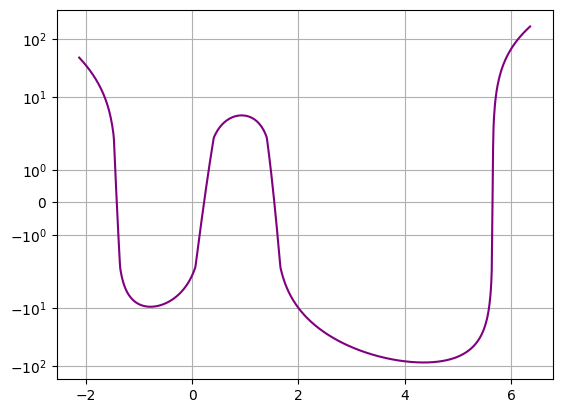


eigin vectors:
 x_1: [-0.22204311  0.51591039 -0.75727407  0.33327063]
 x_2: [-0.52192073 -0.45486916  0.15344709  0.70508637]
 x_3: [ 0.62892977 -0.57257421 -0.4856538   0.20185761]
 x_4: [0.53173694 0.44619371 0.40881477 0.59248416]

Eigen vectors are orthogonal


In [98]:
n = 4
a = np.array([[2.2, 1, 0.5, 2],
             [1, 1.3, 2, 1],
             [0.5, 2, 0.5, 1.6],
             [2, 1, 1.6, 2]])
print('matrix:')
print_matrix(a)
intervals = find_gershgorin_intervals(a)
print(f'\nU intervals: {intervals}')
# B = B_1 * B_2 * ... B_(n-1)
# P = B_(n-1)^(-1)*...B_1^(-1) * A * B_1 * ... B_(n-1)
B, P = danilevsky_algo(a)
print(f'\np:\n {P}')
print()
print(f'B:\n {B}')
equatationCoeffs = list(map(lambda num: num * (-1), P[0]))
equatationCoeffs = np.insert(equatationCoeffs, 0, 1)
print(f'\nequatation coeffs: {equatationCoeffs}')

# собтвенные значения
vals = find_eigen_values(equatationCoeffs, intervals, 10e-3)
print(f'\nlambdas: {vals}')

# проверка вычисленных сосбвтенных значений по теореме Виета
sum_eigens = np.sum(vals)
sp = [sum(a[i][i] for i in range(0, len(a)))]
# print(sum_eigens)
# print(sp)
if (np.abs(sum_eigens - sp) > 0.1):
  print("\nVieta`s theorem doesn`t work")
else:
  print("\nVieta`s theorem works")

# проверка условий теоремы Гершгорина
ok = 0
for interval in intervals:
  for i in vals:
    if i > interval[1] or i < interval[0]:
      print("\nGershgorin`s theorem error")
      ok = 0
      sys.exit()
    else:
      ok = 1
if ok == 1:
  print("\nGershgorin`s theorem works")

#  строим график
show_chart(vals, equatationCoeffs)

# собтвенные вектора
vecs = find_eigen_vectors(vals, B)
print('\neigin vectors:')
for i in range(len(vecs)):
  print(f' x_{i+1}: {vecs[i]}')

# проверка условия ортогональности собственных векторов
ort = 0
for i in range (n - 1):
  for j in range (i + 1, n):
    scal = scalar_mul(vecs[i], vecs[j])
    if np.abs(scal) > 0.1:
      print("\nEigen vectors are not orthogonal")
      print(np.abs(scal))
      ort = 0
      sys.exit()
    else:
      ort = 1

if ort == 1:
  print("\nEigen vectors are orthogonal")

test 2

<ipython-input-76-957dddff0d43>:20: RuntimeWarning: overflow encountered in double_scalars
  alpha = y_left * y_right
<ipython-input-76-957dddff0d43>:26: RuntimeWarning: overflow encountered in double_scalars
  beta = y_left * y_middle



Vieta`s theorem doesn`t work

Gershgorin`s theorem works


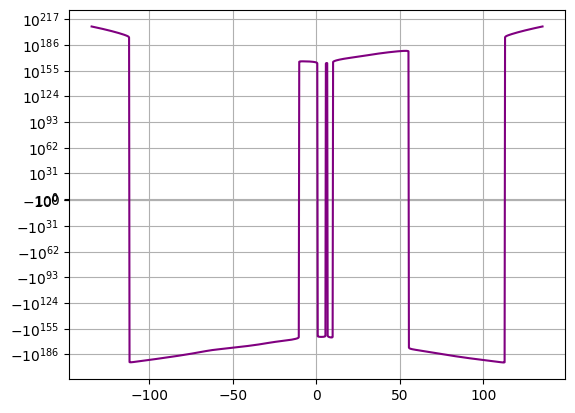


Eigen vectors are not orthogonal
0.35509084200047425


SystemExit: ignored

In [100]:
n = 100
a = generate_symmetrical_matrix(-10, 10, 100)
# print('matrix:')
# print_matrix(a)
intervals = find_gershgorin_intervals(a)
# print(f'\nU intervals: {intervals}')
# B = B_1 * B_2 * ... B_(n-1)
# P = B_(n-1)^(-1)*...B_1^(-1) * A * B_1 * ... B_(n-1)
B, P = danilevsky_algo(a)
# print(f'\np:\n {P}')
# print()
# print(f'B:\n {B}')
equatationCoeffs = list(map(lambda num: num * (-1), P[0]))
equatationCoeffs = np.insert(equatationCoeffs, 0, 1)
# print(f'\nequatation coeffs: {equatationCoeffs}')

# собтвенные значения
vals = find_eigen_values(equatationCoeffs, intervals, 10e-3)
# print(f'\nlambdas: {vals}')

# проверка вычисленных сосбвтенных значений по теореме Виета
sum_eigens = np.sum(vals)
sp = [sum(a[i][i] for i in range(0, len(a)))]
# print(sum_eigens)
# print(sp)
if (np.abs(sum_eigens - sp) > 0.1):
  print("\nVieta`s theorem doesn`t work")
else:
  print("\nVieta`s theorem works")

# проверка условий теоремы Гершгорина
ok = 0
for interval in intervals:
  for i in vals:
    if i > interval[1] or i < interval[0]:
      print("\nGershgorin`s theorem error")
      ok = 0
      sys.exit()
    else:
      ok = 1
if ok == 1:
  print("\nGershgorin`s theorem works")

#  строим график
show_chart(vals, equatationCoeffs)

# собтвенные вектора
vecs = find_eigen_vectors(vals, B)
# print('\neigin vectors:')
# for i in range(len(vecs)):
#   print(f' x_{i+1}: {vecs[i]}')

# проверка условия ортогональности собственных векторов
ort = 0
for i in range (n - 1):
  for j in range (i + 1, n):
    scal = scalar_mul(vecs[i], vecs[j])
    if np.abs(scal) > 0.1:
      print("\nEigen vectors are not orthogonal")
      print(np.abs(scal))
      ort = 0
      sys.exit()
    else:
      ort = 1

if ort == 1:
  print("\nEigen vectors are orthogonal")